In [1]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold


In [2]:

# df_TagDesc = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\CSV\Not for Processing\TagDesc.csv')

df_All_1 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_1o2.csv')
df_All_2 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_2o2.csv')
# Concatenate (union) the dataframes
df_All = pd.concat([df_All_1, df_All_2], ignore_index=True)

print(df_All.head())


   425_pct_Al  M_Value  C4_pct_Eth  C4_pct_H2O  HydWtr_pct_Ammonia   DI55152  \
0    6.307630  3.50893    2.508420    21.96340            0.908765  0.925255   
1    6.308335  3.50863    2.511135    21.96865            0.907643  0.924281   
2    6.309390  3.50818    2.515210    21.97655            0.905959  0.923773   
3    6.310090  3.50788    2.517925    21.98185            0.904837  0.924103   
4    6.310790  3.50758    2.520640    21.98715            0.903715  0.924258   

    FC55003       FC55552      FC55569  FFC55553  FFC55555    LC55555  \
0  4919.290  41564.100000  6918.110000  0.996975  0.751501  59.968800   
1  5039.445  41558.250000  6919.960000  0.998847  0.750588  59.932300   
2  5268.620  41524.066667  6916.486667  0.998648  0.750505  60.002433   
3  5349.320  41500.275000  6918.470000  1.000349  0.750325  60.015925   
4  5563.165  41466.625000  6915.790000  1.000862  0.750021  60.020500   

    PI55004   TC55552     TI55021    Butanol  
0  1.306310  177.1880  212.861000

In [3]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [5]:
# # List of columns to exclude to run XGboost feature selection
# exclude_columns = [#'Date',
#                  'C4_pct_Hex', 'HydWtr_Na2O',
#                  'TC55555'  
#                    ]

# # Create a new DataFrame without the excluded columnsd
# df_All = df_All.drop(columns=exclude_columns)

In [6]:
df_All.columns

Index(['425_pct_Al', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O',
       'HydWtr_pct_Ammonia', 'DI55152', 'FC55003', 'FC55552', 'FC55569',
       'FFC55553', 'FFC55555', 'LC55555', 'PI55004', 'TC55552', 'TI55021',
       'Butanol'],
      dtype='object')

In [7]:
# df_All = df_All[df_All['Date'] > '2020-06-15 00:00:00']

In [8]:
# df_All.drop('Date', axis=1, inplace=True)




In [9]:
print(df_All.describe())

         425_pct_Al       M_Value    C4_pct_Eth    C4_pct_H2O  \
count  56390.000000  56390.000000  56390.000000  56390.000000   
mean       6.111431      3.604671      1.288459     20.732024   
std        0.320365      0.172066      0.705428      2.861318   
min        0.252306      1.461875      0.086948      7.932310   
25%        5.985006      3.507271      0.681404     18.310450   
50%        6.129580      3.596178      1.299502     20.678075   
75%        6.269913      3.696815      1.727776     22.972850   
max        8.020685      5.827565      8.711360     33.731050   

       HydWtr_pct_Ammonia       DI55152       FC55003       FC55552  \
count        56390.000000  56390.000000  56390.000000  56390.000000   
mean             0.968766      0.944868   5942.937622  36148.032931   
std              0.145111      0.043131    791.822524   4240.706992   
min              0.390025      0.815428   2991.532500  18869.325000   
25%              0.877197      0.915588   5444.710625  3500

In [10]:
# Assuming your data is in filtered_df and you want to predict 'target_column_name'
X = df_All.drop('Butanol', axis=1)  # Replace 'target_column_name' with your target column's name
y = df_All['Butanol']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialize and train the XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    objective ='reg:squarederror', 
    learning_rate=0.05,
    n_estimators=800,
    max_depth=10,
    subsample=0.6,
    colsample_bytree=1,
    gamma=0,
    alpha=0.1,
    reg_lambda=1.5,
    colsample_bylevel=0.8,
    colsample_bynode=0.7
)
xgb_model.fit(X_train, y_train)

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.8, colsample_bynode=0.7, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=None, num_parallel_tree=None, ...)

In [13]:
# Predict on training data
y_train_pred = xgb_model.predict(X_train)

# Evaluate the model on training data
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error on Training Data: {mse_train}")



# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the Testing Data: {mse}")

rmse_train = np.sqrt(mse_train)
print(f"Root Mean Squared Error on Training Data: {rmse_train}")


rmse = np.sqrt(mse)
print(f"Root Mean Squared Error on the Testing Data: {rmse}")

# Calculate R-squared
r2_train = r2_score(y_train, y_train_pred)
print(f"R-squared value on Training Data:: {r2_train:.2f}")


# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared value on the Testing Data: {r2:.2f}")

current_features = X.columns.tolist()

# Calculate Adjusted R-squared
def adjusted_r2(r2, n, k):
    """
    Compute the adjusted R^2 from R^2, number of samples (n) and number of predictors (k).
    
    Args:
    - r2 (float): R^2 value
    - n (int): number of samples
    - k (int): number of predictors

    Returns:
    - float: adjusted R^2 value
    """
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)


adj_r2 = adjusted_r2(r2, len(y_test), len(current_features))

print(f"Adjusted R^2 value: {adj_r2}")

Mean Squared Error on Training Data: 0.1038214779460993
Mean Squared Error on the Testing Data: 2.656369900054918
Root Mean Squared Error on Training Data: 0.322213404355094
Root Mean Squared Error on the Testing Data: 1.6298373845432919
R-squared value on Training Data:: 1.00
R-squared value on the Testing Data: 0.97
Adjusted R^2 value: 0.9708909948902722


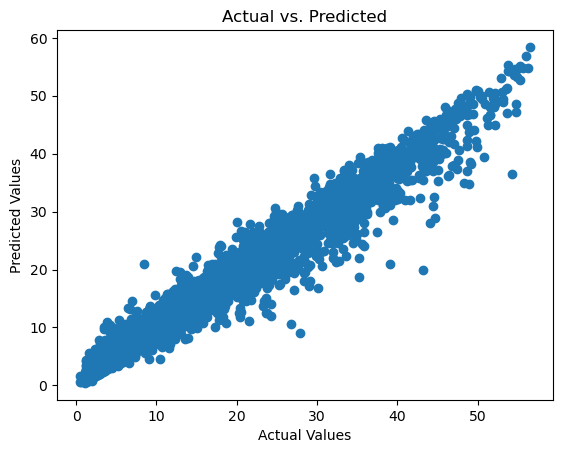

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()


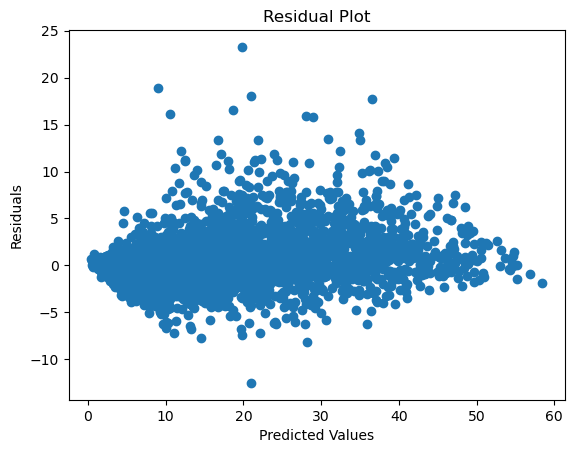

In [15]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [16]:
num_rows = df_All.shape[0]

splits = num_rows//10000

if splits < 5:
    splits = 5

In [17]:
# Define the K-fold cross validator
kfold = KFold(n_splits=splits, shuffle=True, random_state=42)

# Perform K-fold cross-validation
scores = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Take the square root of the scores to get the RMSE
rmse_scores = np.sqrt(-scores)

# Print out the results
print(f'Scores for each fold are: {rmse_scores}')
print(f'Average RMSE: {np.mean(rmse_scores)}')
print(f'Standard deviation of RMSE: {np.std(rmse_scores)}')

Scores for each fold are: [1.89578151 1.94501204 2.00137045 2.00309595 1.9843566 ]
Average RMSE: 1.9659233100291573
Standard deviation of RMSE: 0.040829509651875116


In [18]:
df_All.columns

Index(['425_pct_Al', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O',
       'HydWtr_pct_Ammonia', 'DI55152', 'FC55003', 'FC55552', 'FC55569',
       'FFC55553', 'FFC55555', 'LC55555', 'PI55004', 'TC55552', 'TI55021',
       'Butanol'],
      dtype='object')